### Familiarization with the Scikit-Learn (sklearn) library for Machine Learning ###

We shall develop a simple classification example and work with all the commongly used classes & functions of sklearn

User guide: https://scikit-learn.org/stable/user_guide.html


Tutorials: https://scikit-learn.org/stable/tutorial/index.html


### We shall import the required sklearn modules as we build our application step by step so that the context is understood

##### <u>Classification</u>

Classification is the exercise of building a model to predict which category an observation belongs to. For example, a model that predicts whether an email is a spam / not spam or a sentiment is positive / negative or a particular location is good / not good to start a pizza outlet.

A fitted model would:
    
    - enable predictions based on new inputs, 
    - Some algorithms expose the features of the dataset which had the most influence on the outcome and 
    - allow us to analyze its performance
    - tweak the model it if required.

##### Let us build a Classification ML Model using this process

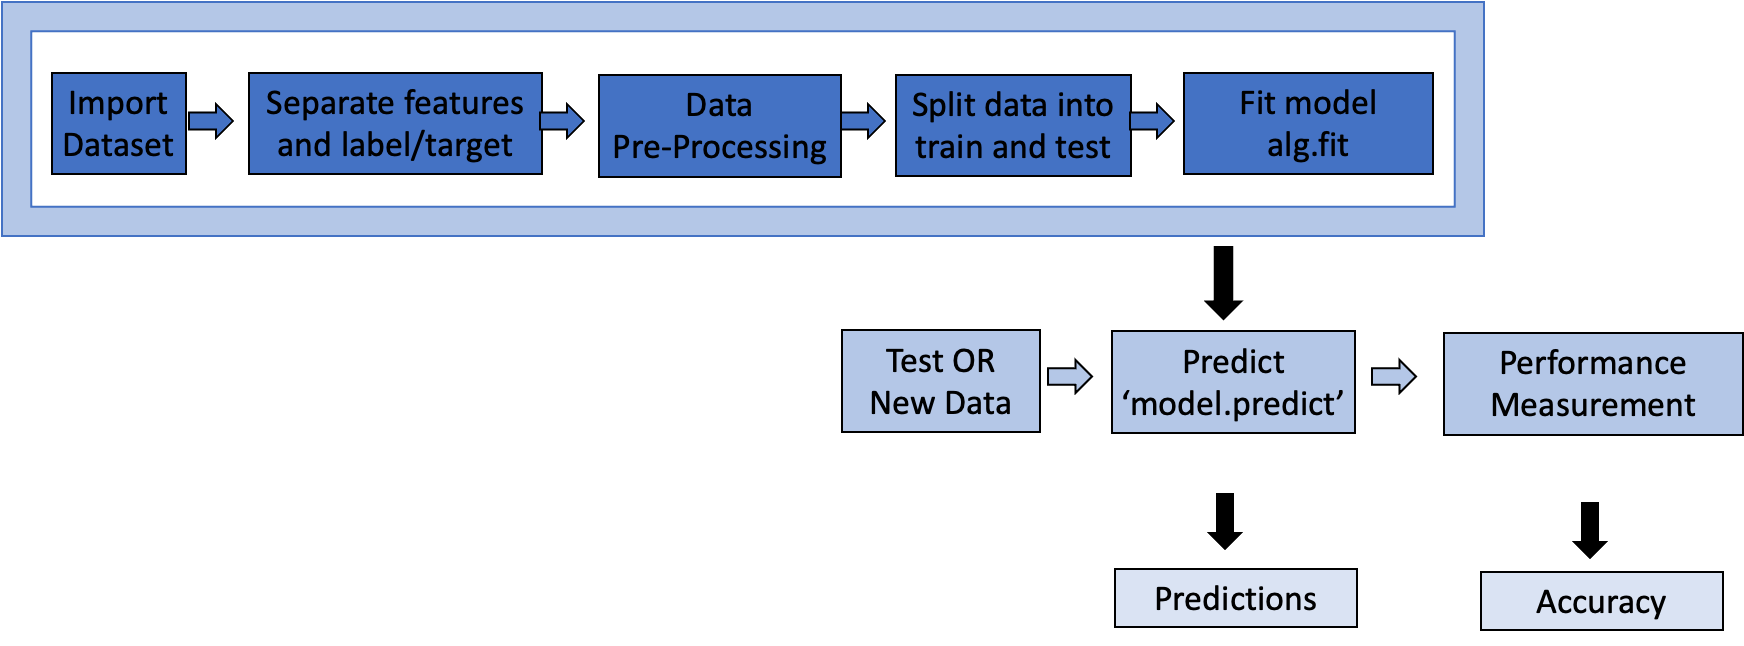

In [3]:
# Import the usual libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# Let us get some sample data from a csv file into a pandas dataframe
# This is a dataset which predicts whether a student should get admitted based on 2 test scores
# Historical data

df = pd.read_csv('marks.csv') # reading the data frame using pandas

print(f"Shape: {df.shape}\n\n)Sample:\n{df.head()}") # printing the shape and the first 5 rows

Shape: (100, 3)

)Sample:
   Test 1  Test 2  Admit Status
0    34.6    78.0             0
1    30.3    43.9             0
2    35.8    72.9             0
3    60.2    86.3             1
4    79.0    75.3             1


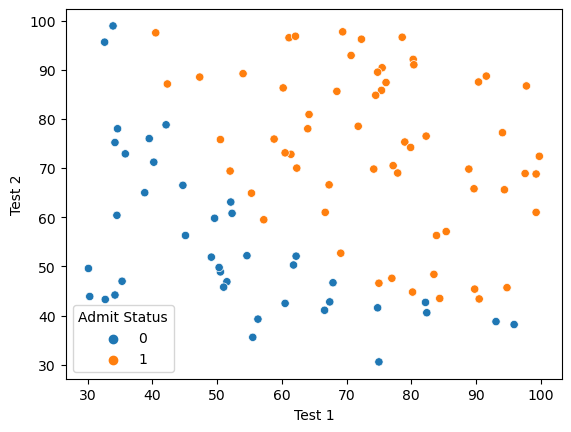

In [3]:
# Let us visualize the data
# We should be able to see all the observations of the 2 classes using a color code.

sns.scatterplot(df,x='Test 1', y='Test 2',hue='Admit Status') # always good to visualize the data
plt.show() # shows us that there is a clear separation between the 2 classes

In [4]:
# Separate the features and the label columns in to X and y
# Features are the test scores and label in this case is the admit status (1 for admit and 0 for don't admit)

X = df.drop('Admit Status', axis=1)  # If you had many features, you could do df.drop('Growth_in_100k',axis=1)
y = df['Admit Status']

print(f"Features:\n{X}\nLabel:\n{y}")

Features:
    Test 1  Test 2
0     34.6    78.0
1     30.3    43.9
2     35.8    72.9
3     60.2    86.3
4     79.0    75.3
..     ...     ...
95    83.5    48.4
96    42.3    87.1
97    99.3    68.8
98    55.3    64.9
99    74.8    89.5

[100 rows x 2 columns]
Label:
0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Admit Status, Length: 100, dtype: int64


In [5]:
# Now we are ready to split the data into train and test parts
# Here we will import our first sklearn function to do this split
# The command we will use is 'train_test_split()'

from sklearn.model_selection import train_test_split
# there is no missing values and we can reasonable seperate the two classes, so there is no need for preprocessing

In [6]:
# The above function will give us training data (to train a model) and test data (to evaluate the model)
# Training data will have 'X_train & y_train' and 'test data X_test & y_test'

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.1,random_state=42)

# Let us see if this did it right
# We should have 89 training samples and 10 testing samples (10% of the data points)

print(X_train.shape,X_test.shape,type(X_train))

(90, 2) (10, 2) <class 'pandas.core.frame.DataFrame'>


In [7]:
# Now comes the time to select an algorithm from the sklearn library
# Let us import 'Logistic Regression' - the most basic binary classification algorithm
# Logistic regression separates the two classes with a straight line

from sklearn.linear_model import LogisticRegression # Logistic() is a class 

In [8]:
# Let instantiate an object of this class

logreg = LogisticRegression()  # If you look at the guide, there are many arguments, but we shall stick to the basic algorithm with defaults

# We can now use the training data to train or fit a model and it is as simple as:

logreg.fit(X_train,y_train)

# Let us check how our model did on the training data by using the model to predict y_train

y_train_pred = logreg.predict(X_train)

In [9]:
# Now we can use this model to predict on the retained test values

y_pred = logreg.predict(X_test)  #Object has a predict() mehtod builtin

print(f"Predicted values for the test data are:\n{y_pred}")

Predicted values for the test data are:
[0 0 0 0 0 0 0 1 1 0]


In [10]:
# Now we want to measure the metrics of our models
# We want to see with what minimum error the model was built with train data?
# What is the error on the test data?

# To do this, we import the metrics from the sklearn metrics sub modules

from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
# Let us look at the perfromance of our model with the Accuracy and Confusion Matrix metrics on training data

# Accuracy
print(f"Accuracy of our model is: {accuracy_score(y_train_pred,y_train)*100}%")


Accuracy of our model is: 90.0%


### What is a confusion Matrix? ###

<img src="conf_matrix.png" width=500>

    True Positives (TP): These are the instances when the model correctly predicted the positive class. For example, if we're predicting whether an email is spam and the model correctly identifies a spam email, that's a true positive.

    True Negatives (TN): These are the instances when the model correctly predicted the negative class. Continuing with the email example, this would be when the model correctly identifies a non-spam email.

    False Positives (FP): These are instances when the model incorrectly predicted the positive class. This would occur when a model identifies an email as spam, but it's actually not.

    False Negatives (FN): These are instances when the model incorrectly predicted the negative class. For instance, the model labels an email as not spam when it actually is.
    
    In this way, a confusion matrix provides a detailed breakdown of the model's performance, showing not just how many predictions were right, but also what kinds of mistakes the model is making. This information can be crucial when tuning a model or comparing different models, as certain types of errors might be more acceptable than others, depending on the specific application.

    
    



Value Counts of train data:
Admit Status
1    58
0    32
Name: count, dtype: int64

Confusion Matrix:
[[27  4]
 [ 5 54]]



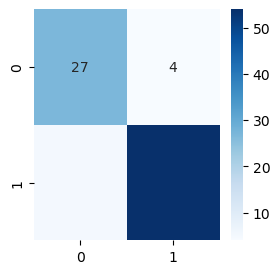

In [21]:
# Confusion Matrix for this specific example

print(f"Value Counts of train data:\n{y_train.value_counts()}\n")

cm = confusion_matrix(y_train_pred, y_train) # Assign it to a variable

print(f"Confusion Matrix:\n{confusion_matrix(y_train_pred,y_train)}\n")
# Top-left: True Positives
# Top-right: False Positives
# Bottom-left: False Negatives
# Bottom-right: True Negatives


# Plot it to make it look nice and easy to read
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()

In [23]:
# Performance on test data

print(f"Accuracy on test data: {accuracy_score(y_pred,y_test)*100}%")

print(f"Confusion Matrix:\n{confusion_matrix(y_pred,y_test)}")
# tells us that the actual predictions are 10% less than the training data
# however, we only have 10 test data points, so it is not a good representation of the model's performance

Accuracy on test data: 80.0%
Confusion Matrix:
[[7 1]
 [1 1]]


In [24]:
# We can conclude that the model is fairly accurate and does equally well on test data
# It predicted only 2 values wrong
# In other words we say - The Model "Generalizes" well

# Now we can use the model and predict the output for a new input
# New input / inputs can be fed as a numpy array or as a pandas series
# In this case the original model was built on features and so we have to feed in 2 featurs as a row of observation|

new_input = np.array([[50,80]])

# Predict and check on line of regrerssion
logreg.predict(new_input)

/Users/swapnilroy/miniconda3/envs/info2000/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

#### Getting the coordinates of the Decision Boundary from the final model ####

The logistic regression algorithms, as we now know, separates the 2 classes by a line,<br>Therefore, we should be able to get the coefficients of that line (slope and intercept). 

In this case the line would have the equation $\theta_0 + \theta_1*x1 +\theta_2*x2$, where $x1,x2$ are the 2 features.<br>

The logistic regression object has a method which gives us those values and that should enable us tovplot that line.


In [25]:
# Getting the coordinates

intercept = logreg.intercept_
slope = logreg.coef_

print(f"The intercept of the decision boundary line is {intercept}\nand the Slope is: {slope}")

The intercept of the decision boundary line is [-29.83446954]
and the Slope is: [[0.25376684 0.23020459]]


In [26]:
# Draw the decision boundary
# Since logistic regression separates the classes by a line, we need to find 2 coordinates.

# We are dealing with the equation: theta0 + theta1*x1 +theta2*x2 = 0

# Let us assume x2 = 0, then
x1 = - intercept / slope[0][0]

# Now, assuming x1 = 0, then
x2 = -intercept / slope[0][1]

# The coordinates are:
X1 = (0,np.squeeze(x2)) # squeeze to remove the dimensions
X2 = (np.squeeze(x1),0)

print(X1,X2)

(0, array(129.59980396)) (array(117.5664641), 0)


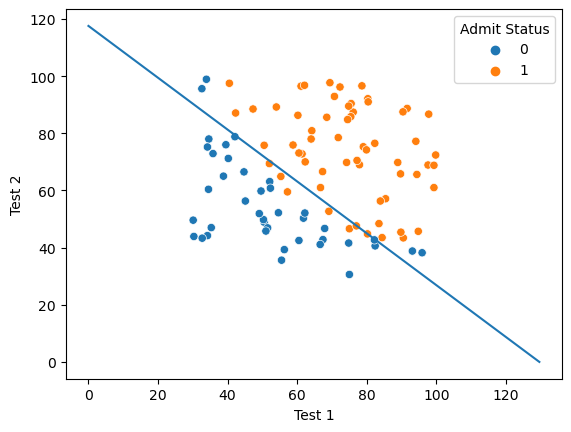

In [27]:
# Plot the decison boundary

sns.scatterplot(df,x='Test 1', y='Test 2',hue='Admit Status')
plt.plot(X1,X2)
plt.show()